In [1]:
from src.d00_utils import definitions as defs
from src.d04_analysis import distortion_performance as dp
from src.d04_analysis import tools3d
import numpy as np
import matplotlib.pyplot as plt
import importlib

wandb: Currently logged in as: austinbergstrom (use `wandb login --relogin` to force relogin)


In [2]:
from pathlib import Path
import importlib

In [3]:
# initialize ModelDistortionPerformanceResult instances for each of the model results to be considered

endpoint_artifact_id = "0018_rlt_0030_mdl_rst4_b5_nf5_best_loss_0040_tst_rs1_bcs3_nfs3_noise"
endpoint_identifier = 'endpoint'
endpoint, __ = dp.get_model_distortion_performance_result(endpoint_artifact_id, endpoint_identifier)

full_range_artifact_id = "0017_rlt_0027_mdl_rst1_b10_nf11_best_loss_0040_tst_rs1_bcs3_nfs3_noise"
full_range_identifier = 'full-range'
full_range, __ = dp.get_model_distortion_performance_result(full_range_artifact_id, full_range_identifier)

mid_band_artifact_id = "0016_rlt_0028_mdl_rst2_b11_nf10_best_loss_0040_tst_rs1_bcs3_nfs3_noise"
mid_band_identifier = 'mid-band'
mid_band, __ = dp.get_model_distortion_performance_result(mid_band_artifact_id, mid_band_identifier)

midpoint_artifact_id = "0015_rlt_0029_mdl_rst3_b4_nf4_best_loss_0040_tst_rs1_bcs3_nfs3_noise"
midpoint_identifier = 'midpoint'
midpoint, __ = dp.get_model_distortion_performance_result(midpoint_artifact_id, midpoint_identifier)

pre_trained_artifact_id = "0014_rlt_0001_0040_tst_rs1_bcs3_nfs3_noise"
pre_trained_identifier = 'pre-trained'
pre_trained, __ = dp.get_model_distortion_performance_result(pre_trained_artifact_id, pre_trained_identifier)

In [4]:
output_dir = Path(defs.ROOT_DIR, defs.REL_PATHS['analysis'], 'combined')
if not output_dir.is_dir():
    Path.mkdir(output_dir)
    print('created ', str(output_dir))

In [8]:
# place results into a single list for easier iteration
# results = [pre_trained, midpoint, mid_band, full_range, endpoint]'
importlib.reload(dp)

<module 'src.d04_analysis.distortion_performance' from '/home/acb6595/sat6/image-quality-for-deep-learning/src/d04_analysis/distortion_performance.py'>

In [9]:
# create some helper functions to plot results together with minimal pain
def create_identifier(perf_results, dim_tag=None):

    if dim_tag:
        identifier = dim_tag
    else:
        identifier = None

    for perf_result in perf_results:
        if not identifier:
            identifier = str(perf_result)
        else:
            identifier = f'{identifier}_{str(perf_result)}'

    # if dim_tag:
    #     identifier = f'{identifier}_{dim_tag}'

    return identifier

def plot_results_together(model_results, directory=None, make_subdir=False, dim_tag='2d'):

    if dim_tag == '2d':
        identifier = create_identifier(model_results)
    else:
        identifier = create_identifier(model_results, dim_tag=dim_tag)

    if directory and make_subdir:
        sub_dir = Path(directory, identifier)
        if not sub_dir.is_dir():
            Path.mkdir(sub_dir)

        directory = sub_dir

    if dim_tag == '2d':
        dp.plot_perf_2d_multi_result(model_results, directory=directory, identifier=identifier)
    else:
        dp.plot_perf_1d_multi_result(model_results, directory=directory, identifier=identifier)


In [ ]:
# plot pre-trained and full range model results together
plot_results_together([pre_trained, full_range], directory=output_dir, make_subdir=True)

In [ ]:
# plot pre-trained and endpoint results together
plot_results_together([pre_trained, endpoint], directory=output_dir, make_subdir=True)

In [ ]:
# plot midpoint and mid-band together
plot_results_together([midpoint, mid_band], directory=output_dir, make_subdir=True)

In [ ]:
# plot full range with everything else
plot_results_together([full_range, pre_trained], directory=output_dir, make_subdir=True)
plot_results_together([full_range, midpoint], directory=output_dir, make_subdir=True)
plot_results_together([full_range, mid_band], directory=output_dir, make_subdir=True)
plot_results_together([full_range, endpoint], directory=output_dir, make_subdir=True)

In [ ]:
plot_results_together([full_range, mid_band, midpoint, endpoint, pre_trained], directory=output_dir, make_subdir=True)

In [ ]:
plot_results_together([full_range, pre_trained], directory=output_dir, make_subdir=True, dim_tag='1d')

full-range res linear fit:  [[0.16432074]
 [0.746268  ]]
full-range res linear fit correlation:  0.9840143575749252 

mid-band res linear fit:  [[0.2007633 ]
 [0.70754778]]
mid-band res linear fit correlation:  0.9753659384018841 

midpoint res linear fit:  [[0.24132481]
 [0.55911589]]
midpoint res linear fit correlation:  0.9855760048228775 

endpoint res linear fit:  [[-0.22222534]
 [ 0.83107476]]
endpoint res linear fit correlation:  0.9934492013049051 

pre-trained res linear fit:  [[-0.07360309]
 [ 0.46326529]]
pre-trained res linear fit correlation:  0.7773058428970593 



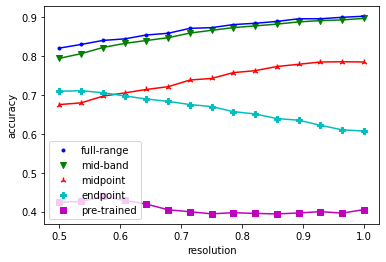

full-range blur linear fit:  [[-0.02979748]
 [ 0.92411649]]
full-range blur linear fit correlation:  0.9974330812086145 

mid-band blur linear fit:  [[-0.04041702]
 [ 0.93205276]]
mid-band blur linear fit correlation:  0.9251617722878509 

midpoint blur linear fit:  [[-0.02497602]
 [ 0.78638889]]
midpoint blur linear fit correlation:  0.31026251410333255 

endpoint blur linear fit:  [[0.06107517]
 [0.55329446]]
endpoint blur linear fit correlation:  0.9861314035418247 

pre-trained blur linear fit:  [[-0.06458785]
 [ 0.52368423]]
pre-trained blur linear fit correlation:  0.7858538947101221 



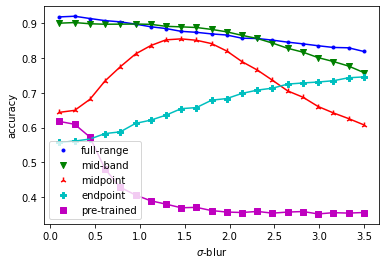

full-range noise linear fit:  [[-0.001311  ]
 [ 0.88352539]]
full-range noise linear fit correlation:  0.9460056602167749 

mid-band noise linear fit:  [[-0.00124433]
 [ 0.87165799]]
mid-band noise linear fit correlation:  0.8219788638181222 

midpoint noise linear fit:  [[-2.09725733e-04]
 [ 7.43425123e-01]]
midpoint noise linear fit correlation:  0.0639031938160627 

endpoint noise linear fit:  [[-0.0034618 ]
 [ 0.69789362]]
endpoint noise linear fit correlation:  0.9353107664041822 

pre-trained noise linear fit:  [[0.0019858 ]
 [0.38745222]]
pre-trained noise linear fit correlation:  0.26412167636528505 



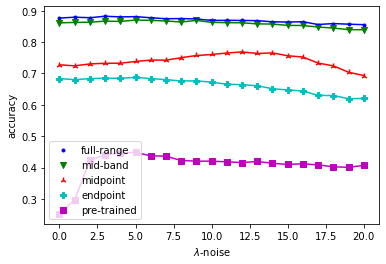

In [11]:
plot_results_together([full_range, mid_band, midpoint, endpoint, pre_trained], directory=output_dir, make_subdir=True, dim_tag='1d')

full-range res linear fit:  [[0.16432074]
 [0.746268  ]]
full-range res linear fit correlation:  0.9840143575749252 

mid-band res linear fit:  [[0.2007633 ]
 [0.70754778]]
mid-band res linear fit correlation:  0.9753659384018841 

midpoint res linear fit:  [[0.24132481]
 [0.55911589]]
midpoint res linear fit correlation:  0.9855760048228775 

endpoint res linear fit:  [[-0.22222534]
 [ 0.83107476]]
endpoint res linear fit correlation:  0.9934492013049051 



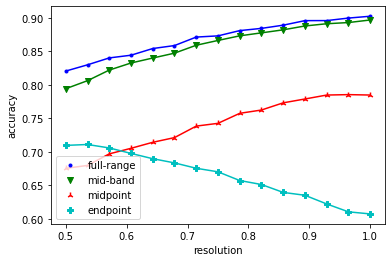

full-range blur linear fit:  [[-0.02979748]
 [ 0.92411649]]
full-range blur linear fit correlation:  0.9974330812086145 

mid-band blur linear fit:  [[-0.04041702]
 [ 0.93205276]]
mid-band blur linear fit correlation:  0.9251617722878509 

midpoint blur linear fit:  [[-0.02497602]
 [ 0.78638889]]
midpoint blur linear fit correlation:  0.31026251410333255 

endpoint blur linear fit:  [[0.06107517]
 [0.55329446]]
endpoint blur linear fit correlation:  0.9861314035418247 



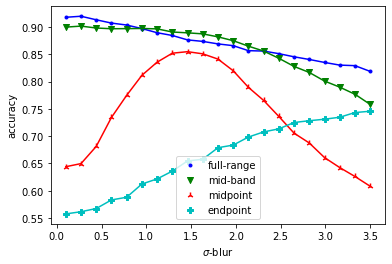

full-range noise linear fit:  [[-0.001311  ]
 [ 0.88352539]]
full-range noise linear fit correlation:  0.9460056602167749 

mid-band noise linear fit:  [[-0.00124433]
 [ 0.87165799]]
mid-band noise linear fit correlation:  0.8219788638181222 

midpoint noise linear fit:  [[-2.09725733e-04]
 [ 7.43425123e-01]]
midpoint noise linear fit correlation:  0.0639031938160627 

endpoint noise linear fit:  [[-0.0034618 ]
 [ 0.69789362]]
endpoint noise linear fit correlation:  0.9353107664041822 



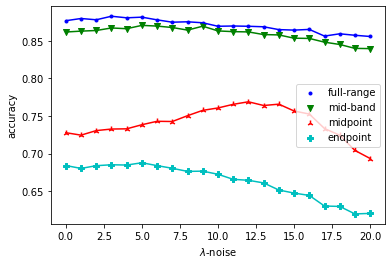

In [12]:
plot_results_together([full_range, mid_band, midpoint, endpoint], directory=output_dir, make_subdir=True, dim_tag='1d')